# Home Assignment 2 - CS5720 Neural Networks and Deep Learning
**Student: Bhavana Akula**
**Summer 2025**

## Question 1: Convolution Operations with Different Parameters

In [3]:

import numpy as np
import tensorflow as tf

# Define input matrix and kernel
input_matrix = np.array([[1, 2, 3, 0, 1],
                         [0, 1, 2, 3, 1],
                         [1, 0, 1, 2, 2],
                         [2, 1, 0, 1, 0],
                         [1, 2, 1, 0, 1]], dtype=np.float32)

kernel = np.array([[0, 1, 2],
                   [2, 2, 0],
                   [0, 1, 2]], dtype=np.float32)

# Reshape input and kernel
input_tensor = tf.constant(input_matrix.reshape(1, 5, 5, 1))
kernel_tensor = tf.constant(kernel.reshape(3, 3, 1, 1))

# Apply different convolutions
def apply_conv(stride, padding):
    return tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)

results = {
    "Stride=1, Padding=VALID": apply_conv(1, 'VALID'),
    "Stride=1, Padding=SAME": apply_conv(1, 'SAME'),
    "Stride=2, Padding=VALID": apply_conv(2, 'VALID'),
    "Stride=2, Padding=SAME": apply_conv(2, 'SAME'),
}

for key, val in results.items():
    print(f"{key} output:\n{val.numpy().squeeze()}\n")


Stride=1, Padding=VALID output:
[[12. 14. 18.]
 [ 8. 12. 12.]
 [12.  8. 10.]]

Stride=1, Padding=SAME output:
[[ 4. 11. 18. 11.  3.]
 [ 6. 12. 14. 18. 11.]
 [ 8.  8. 12. 12.  9.]
 [10. 12.  8. 10.  5.]
 [ 6.  7.  8.  3.  2.]]

Stride=2, Padding=VALID output:
[[12. 18.]
 [12. 10.]]

Stride=2, Padding=SAME output:
[[ 4. 18.  3.]
 [ 8. 12.  9.]
 [ 6.  8.  2.]]



## Question 2 Task 1: Edge Detection Using Sobel Filter

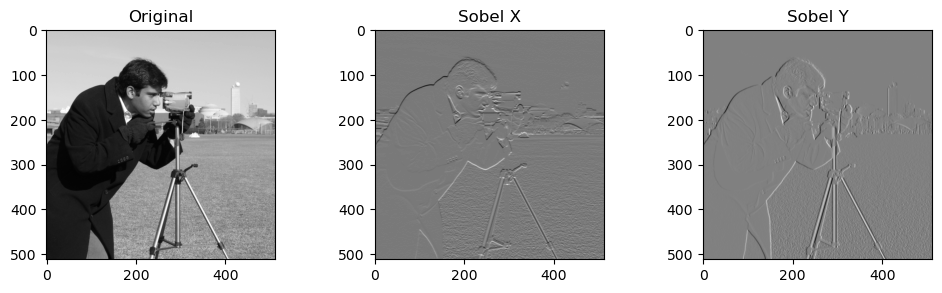

In [10]:

from skimage import data, filters
import matplotlib.pyplot as plt

# Load default camera image
img = data.camera()

# Sobel edge detection
sobel_x = filters.sobel_h(img)
sobel_y = filters.sobel_v(img)

# Plot the results
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(1, 3, 3), plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel Y")
plt.tight_layout()
plt.show()

## Question 2 Task 2: Max Pooling and Average Pooling

In [12]:

import tensorflow as tf

# Create 4x4 random matrix
input_matrix = tf.constant(np.random.randint(0, 10, (1, 4, 4, 1)), dtype=tf.float32)
print("Original Matrix:\n", input_matrix.numpy().squeeze())

# Apply MaxPooling and AveragePooling
max_pooled = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')
avg_pooled = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

print("\nMax Pooled Matrix:\n", max_pooled.numpy().squeeze())
print("\nAverage Pooled Matrix:\n", avg_pooled.numpy().squeeze())


Original Matrix:
 [[2. 4. 1. 7.]
 [6. 8. 1. 4.]
 [1. 4. 1. 1.]
 [3. 6. 4. 3.]]

Max Pooled Matrix:
 [[8. 7.]
 [6. 4.]]

Average Pooled Matrix:
 [[5.   3.25]
 [3.5  2.25]]


## Question 3: Standardization vs Normalization

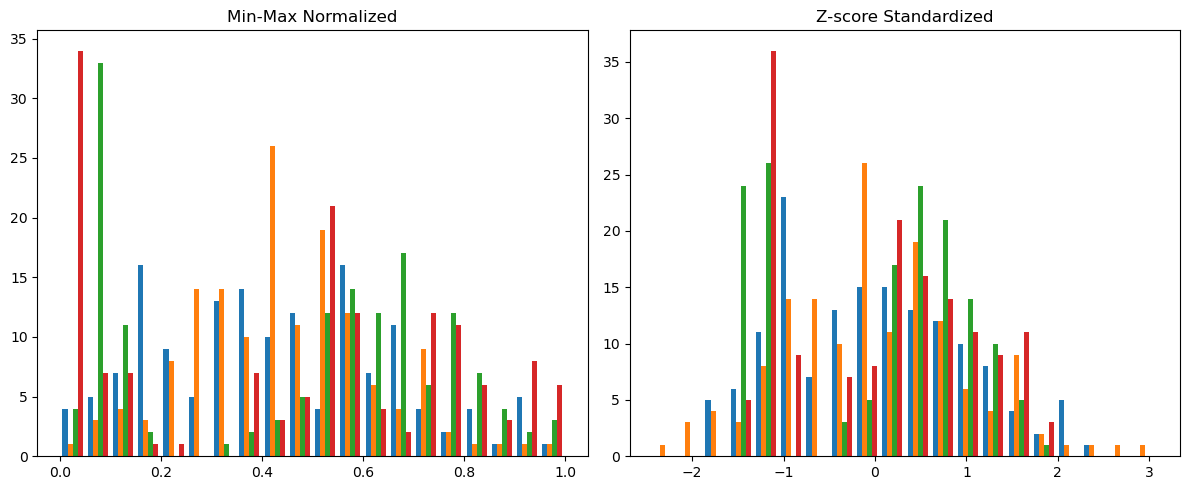

Raw Data Accuracy: 1.00
Normalized Data Accuracy: 0.91
Standardized Data Accuracy: 1.00


In [14]:

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Normalize
minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)

# Standardize
standard = StandardScaler()
X_std = standard.fit_transform(X)

# Plot distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X_norm, bins=20)
plt.title("Min-Max Normalized")

plt.subplot(1, 2, 2)
plt.hist(X_std, bins=20)
plt.title("Z-score Standardized")
plt.tight_layout()
plt.show()

# Train Logistic Regression on raw, normalized, and standardized data
for desc, data in zip(["Raw", "Normalized", "Standardized"], [X, X_norm, X_std]):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{desc} Data Accuracy: {score:.2f}")
